# NAME : SHREYAS (25CL05009) ; 12/09/2025

## Downloading & Plotting IMD 20 Years of DAILY Rainfall Data (2004-2023) Excluded Leap Days 
First import the Python library xarray,copy the path of the netcdf4 from the PC.Call the necessary command to execute the lat,lon and time dimention of the data.

In [14]:
import xarray as xr
import glob
pt = 'C:\IMD Net CDF\*.nc'
ds = xr.open_mfdataset(pt)
ds

<xarray.Dataset> Size: 1GB
Dimensions:    (TIME: 7305, LATITUDE: 129, LONGITUDE: 135)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 1kB 66.5 66.75 67.0 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 1kB 6.5 6.75 7.0 7.25 ... 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 58kB 2004-01-01 2004-01-02 ... 2023-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 1GB dask.array<chunksize=(366, 129, 135), meta=np.ndarray>
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6

## Rainfall For Non Leap Days 

In [15]:
print(ds.TIME)
mean_rain = ds['RAINFALL']
mean_rain

<xarray.DataArray 'TIME' (TIME: 7305)> Size: 58kB
array(['2004-01-01T00:00:00.000000000', '2004-01-02T00:00:00.000000000',
       '2004-01-03T00:00:00.000000000', ..., '2023-12-29T00:00:00.000000000',
       '2023-12-30T00:00:00.000000000', '2023-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * TIME     (TIME) datetime64[ns] 58kB 2004-01-01 2004-01-02 ... 2023-12-31
Attributes:
    axis:           T
    time_origin:    31-DEC-1900
    standard_name:  time


<xarray.DataArray 'RAINFALL' (TIME: 7305, LATITUDE: 129, LONGITUDE: 135)> Size: 1GB
dask.array<concatenate, shape=(7305, 129, 135), dtype=float64, chunksize=(366, 129, 135), chunktype=numpy.ndarray>
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 1kB 66.5 66.75 67.0 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 1kB 6.5 6.75 7.0 7.25 ... 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 58kB 2004-01-01 2004-01-02 ... 2023-12-31
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind2004_rfp25.grd

In [16]:
non_leap_day = ds.sel(TIME =~ ((ds['TIME'].dt.month == 2) & (ds['TIME'].dt.day == 29)))
non_leap_day

<xarray.Dataset> Size: 1GB
Dimensions:    (TIME: 7300, LATITUDE: 129, LONGITUDE: 135)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 1kB 66.5 66.75 67.0 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 1kB 6.5 6.75 7.0 7.25 ... 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 58kB 2004-01-01 2004-01-02 ... 2023-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 1GB dask.array<chunksize=(365, 129, 135), meta=np.ndarray>
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6

## Mean Rainfall

In [17]:
mean_rainfall = non_leap_day['RAINFALL'].sel(LATITUDE = 129 , LONGITUDE = 135 ,method = 'nearest')
rainfall_mean = mean_rainfall.groupby('TIME.dayofyear').mean(dim='TIME')
rainfall_mean

<xarray.DataArray 'RAINFALL' (dayofyear: 366)> Size: 3kB
dask.array<stack, shape=(366,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    LONGITUDE  float64 8B 100.0
    LATITUDE   float64 8B 38.5
  * dayofyear  (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind2004_rfp25.grd

## Mean Climatology Rainfall of Bhubaneshwar For Non Leap Days

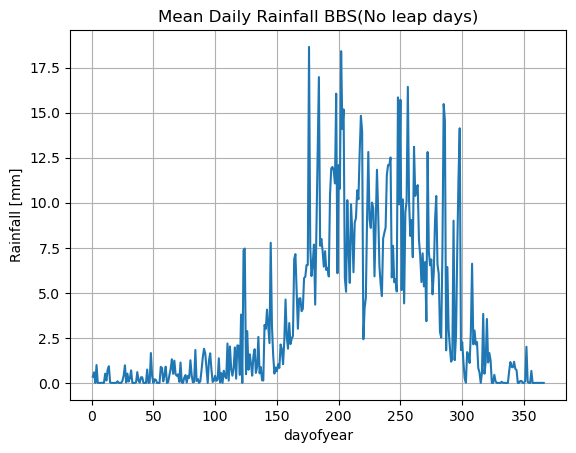

In [28]:
rainfall_bbs = non_leap_day['RAINFALL'].sel(LATITUDE = 20 , LONGITUDE = 85 ,method = 'nearest')
mean_climatolgy_daily_rainfall_bbs= rainfall_bbs.groupby('TIME.dayofyear').mean(dim='TIME')
mean_climatolgy_daily_rainfall_bbs

import matplotlib.pyplot as plt
mean_climatolgy_daily_rainfall_bbs.plot()
plt.title("Mean Daily Rainfall BBS(No leap days)")
plt.grid(True)
plt.show()

## Mean Climatology Rainfall of My City(Shahapur) for Non Leap Days.

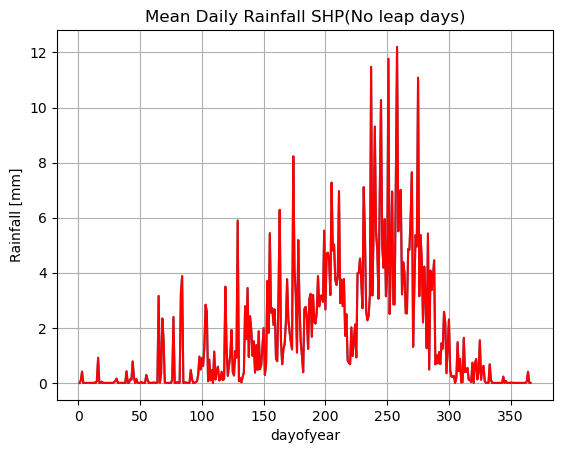

In [29]:
rainfall_shp = non_leap_day['RAINFALL'].sel(LATITUDE = 16.7 , LONGITUDE = 76.8 ,method = 'nearest')
mean_climatolgy_daily_rainfall_shp= rainfall_shp.groupby('TIME.dayofyear').mean(dim='TIME')
mean_climatolgy_daily_rainfall_shp

import matplotlib.pyplot as plt
mean_climatolgy_daily_rainfall_shp.plot()
mean_climatolgy_daily_rainfall_shp.plot(color = 'red',label = 'Shahapur')
plt.title("Mean Daily Rainfall SHP(No leap days)")
plt.grid(True)
plt.show()

## Combined Rainfall of Both The Cities For Non Leap Days

<xarray.DataArray 'RAINFALL' (dayofyear: 366)> Size: 3kB
dask.array<stack, shape=(366,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    LONGITUDE  float64 8B 85.0
    LATITUDE   float64 8B 20.0
  * dayofyear  (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind2004_rfp25.grd <xarray.DataArray 'RAINFALL' (dayofyear: 366)> Size: 3kB
dask.array<stack, shape=(366,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    LONGITUDE  float64 8B 76.75
    LATITUDE   float64 8B 16.75
  * dayofyear  (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind2004_rfp25.grd


C:\Users\91935\AppData\Local\Temp\ipykernel_17800\1945240704.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


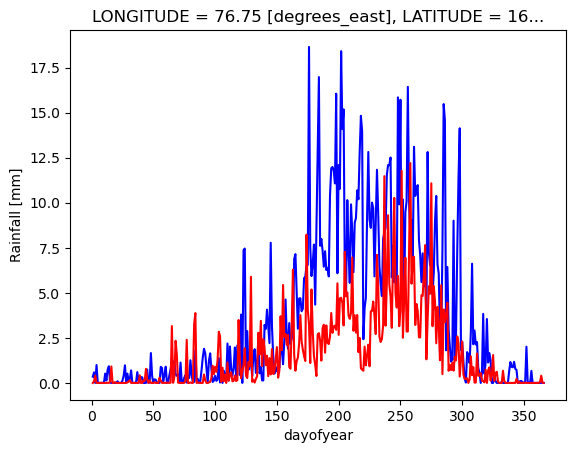

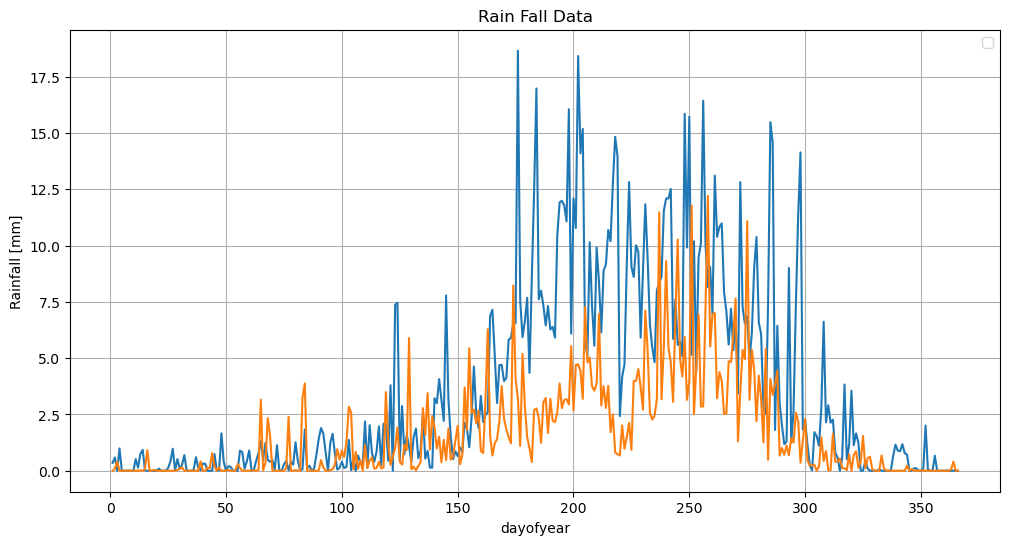

In [27]:
rainfall_bbs = non_leap_day['RAINFALL'].sel(LATITUDE = 20 , LONGITUDE = 85 ,method = 'nearest')
mean_climatolgy_daily_rainfall_bbs= rainfall_bbs.groupby('TIME.dayofyear').mean(dim='TIME')
mean_climatolgy_daily_rainfall_bbs

rainfall_shp = non_leap_day['RAINFALL'].sel(LATITUDE = 16.7 , LONGITUDE = 76.8 ,method = 'nearest')
mean_climatolgy_daily_rainfall_shp= rainfall_shp.groupby('TIME.dayofyear').mean(dim='TIME')
mean_climatolgy_daily_rainfall_shp

print(mean_climatolgy_daily_rainfall_bbs,mean_climatolgy_daily_rainfall_shp)
mean_climatolgy_daily_rainfall_bbs.plot(color = 'blue',label ='Bubaneshwar')
mean_climatolgy_daily_rainfall_shp.plot(color = 'red',label = 'Shahapur')

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
mean_climatolgy_daily_rainfall_bbs.plot()
mean_climatolgy_daily_rainfall_shp.plot()
plt.title("Rain Fall Data")
plt.legend()
plt.grid(True)
plt.show()

## Spatial Mean Plot of The Rainfall

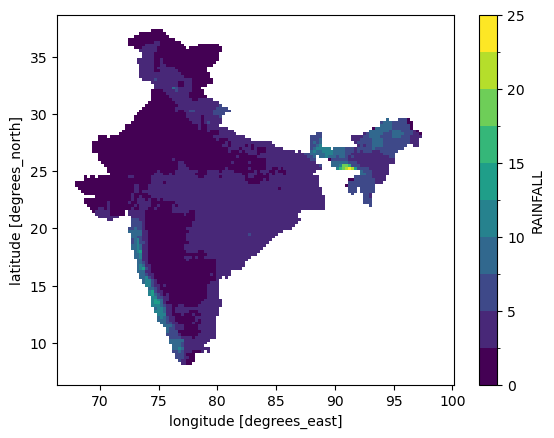

In [10]:
spatial_mean = mean_rain.mean(dim = 'TIME')
spatial_mean.plot(levels=12)

## Anamolies Calculation of The Rainfall Data For The Year 2023

Text(0.5, 1.0, 'Anamolies In Rain Fall Data For The Year 2023')

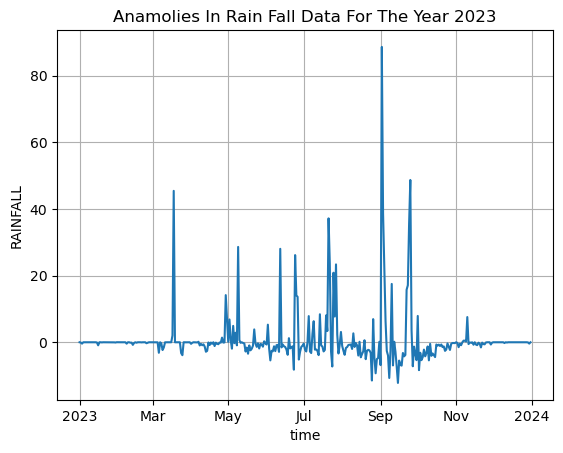

In [30]:
year = 2023
daily_climatology= non_leap_day["RAINFALL"].groupby('TIME.dayofyear').mean('TIME')
year_2023 = ds.sel(TIME=str(year))
anom = year_2023['RAINFALL'].groupby('TIME.dayofyear')-daily_climatology
anom_coord = anom.sel(LATITUDE= 16.7 ,LONGITUDE= 76.8 ,method = 'nearest')
anom_coord.plot()
plt.grid(True)
plt.title("Anamolies In Rain Fall Data For The Year 2023")